# Using Tokenization

## 1. Importing the Libraries

In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import random
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
import math

from sklearn.tree import DecisionTreeClassifier
from collections import Counter
from sklearn.svm import SVC
import seaborn as sns

In [2]:
sns.set()

## 2. Creating the Attributes

In [16]:
#Crawler
flog = open('FinalOp.txt', 'r')         #List containing the Ad URL
fog = open('arg.txt', 'r')              #Easy list arguments

string = []
substr = []

for line in flog.readlines():
    string.append(line)
for line in fog.readlines():
    substr.append(line)

ad = []

#Classification into Ad/Non-Ad for attribute creation
def search():
    
    res = False
    for st in string:
        st = st[:-2]
        for sub in substr: 
            sub = sub[:-2]
            if sub in st:
                res = True
                break
            else:
                res = False
                
        if res:
            ad.append("ad")
        else:
            ad.append("non-ad")
    
    #return ad


#Funtion
search() 

## 3. Alphabet Entropy

In [5]:
#Alphabet Entropy
def entropy(s):
	p, lns = Counter(s), float(len(s))
	return -sum( count/lns * math.log(count/lns, 2) for count in p.values())

## 4. Tokenizer Function

In [6]:
#Tokenization of URL, Getting the tokens
def getTokens(input):
	tokensBySlash = str(input.encode('utf-8')).split('/')	#get tokens after splitting by slash
	allTokens = []
	for i in tokensBySlash:
       	#get tokens after splitting by dash
		tokens = str(i).split('-')
		tokensByDot = []
		for j in range(0,len(tokens)):
            #get tokens after splitting by dot
			tempTokens = str(tokens[j]).split('.')	
			tokensByDot = tokensByDot + tempTokens
		allTokens = allTokens + tokens + tokensByDot
    #remove redundant tokens
	allTokens = list(set(allTokens))	
	if 'com' in allTokens:
    #removing .com since it occurs a lot of times and it should not be included in our features
		allTokens.remove('com')	
	return allTokens

## 5. Bag of Words Model

### 1. Logistic Regression

In [7]:

#Bag of Words Model
def TL():
    record = []
    #path to our all urls file
    allurl = open('FinalOp.txt','r')	
    
    for line in allurl.readlines():
        record.append(line)
    
    #converting to a dataframe    
    allurlsdata = pd.DataFrame(record)
    
    	#converting it into an array
    allurlsdata = np.array(allurlsdata)
    
    labels = np.array(ad)
    corpus = [d[0] for d in allurlsdata]
    	#all labels 
    y = [d[0] for d in labels]
    
    #shuffling
    random.shuffle(allurlsdata)	
    #get a vector for each url but use our customized tokenizer
    vectorizer = TfidfVectorizer(tokenizer=getTokens)	
    
    #get the X vector
    X = vectorizer.fit_transform(corpus)	
    
    	#split into training and testing set 80/20 ratio
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    
    
    #Logistic Regression
    
    lgs = LogisticRegression()	#using logistic regression
    lgs.fit(X_train, y_train)
    
   
    print(lgs.score(X_test, y_test))	#pring the score
    
    # Predicting the Test set results
    y_pred = lgs.predict(X_test)
    
    # Making the Confusion Matrix
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot = True)
    print(classification_report(y_test, y_pred))

    
    return vectorizer, lgs, cm

0.996309963099631
             precision    recall  f1-score   support

          a       1.00      0.83      0.91         6
          n       1.00      1.00      1.00       265

avg / total       1.00      1.00      1.00       271



(TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
         dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
         lowercase=True, max_df=1.0, max_features=None, min_df=1,
         ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
         stop_words=None, strip_accents=None, sublinear_tf=False,
         token_pattern='(?u)\\b\\w\\w+\\b',
         tokenizer=<function getTokens at 0x0000017E7203D840>, use_idf=True,
         vocabulary=None),
 DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False, random_state=0,
             splitter='best'),
 array([[  5,   1],
        [  0, 265]], dtype=int64))

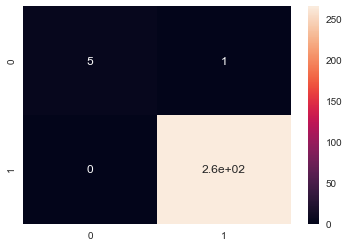

In [15]:
#calling the Function
TL()

### 2. SVM

In [11]:

#Bag of Words Model
def TL():
    record = []
    #path to our all urls file
    allurl = open('FinalOp.txt','r')	
    
    for line in allurl.readlines():
        record.append(line)
    
    #converting to a dataframe    
    allurlsdata = pd.DataFrame(record)
    
    	#converting it into an array
    allurlsdata = np.array(allurlsdata)
    
    labels = np.array(ad)
    corpus = [d[0] for d in allurlsdata]
    	#all labels 
    y = [d[0] for d in labels]
    
    #shuffling
    random.shuffle(allurlsdata)	
    #get a vector for each url but use our customized tokenizer
    vectorizer = TfidfVectorizer(tokenizer=getTokens)	
    
    #get the X vector
    X = vectorizer.fit_transform(corpus)	
    
    	#split into training and testing set 80/20 ratio
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    
    
    #Support Vector Machines
    
    classifier = SVC(kernel='linear',random_state=0)
    classifier.fit(X_train, y_train)
    
   
    print(classifier.score(X_test, y_test))	#pring the score
    
    # Predicting the Test set results
    y_pred = classifier.predict(X_test)
    
    # Making the Confusion Matrix
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot = True)
    print(classification_report(y_test, y_pred))

    
    return vectorizer, classifier, cm

0.988929889298893
             precision    recall  f1-score   support

          a       1.00      0.50      0.67         6
          n       0.99      1.00      0.99       265

avg / total       0.99      0.99      0.99       271



(TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
         dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
         lowercase=True, max_df=1.0, max_features=None, min_df=1,
         ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
         stop_words=None, strip_accents=None, sublinear_tf=False,
         token_pattern='(?u)\\b\\w\\w+\\b',
         tokenizer=<function getTokens at 0x0000017E7203D840>, use_idf=True,
         vocabulary=None),
 SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
   decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
   max_iter=-1, probability=False, random_state=0, shrinking=True,
   tol=0.001, verbose=False),
 array([[  3,   3],
        [  0, 265]], dtype=int64))

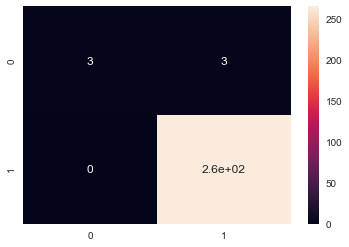

In [12]:
#calling the Function
TL()

### 3. Decision Tree

In [13]:

#Bag of Words Model
def TL():
    record = []
    #path to our all urls file
    allurl = open('FinalOp.txt','r')	
    
    for line in allurl.readlines():
        record.append(line)
    
    #converting to a dataframe    
    allurlsdata = pd.DataFrame(record)
    
    	#converting it into an array
    allurlsdata = np.array(allurlsdata)
    
    labels = np.array(ad)
    corpus = [d[0] for d in allurlsdata]
    	#all labels 
    y = [d[0] for d in labels]
    
    #shuffling
    random.shuffle(allurlsdata)	
    #get a vector for each url but use our customized tokenizer
    vectorizer = TfidfVectorizer(tokenizer=getTokens)	
    
    #get the X vector
    X = vectorizer.fit_transform(corpus)	
    
    	#split into training and testing set 80/20 ratio
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    
    
    #Decision Trees
    
    classifier = DecisionTreeClassifier(criterion='entropy',random_state=0)
    classifier.fit(X_train, y_train)
    
   
    print(classifier.score(X_test, y_test))	#pring the score
    
    # Predicting the Test set results
    y_pred = classifier.predict(X_test)
    
    # Making the Confusion Matrix
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot = True)
    print(classification_report(y_test, y_pred))

    
    return vectorizer, classifier, cm

0.996309963099631
             precision    recall  f1-score   support

          a       1.00      0.83      0.91         6
          n       1.00      1.00      1.00       265

avg / total       1.00      1.00      1.00       271



(TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
         dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
         lowercase=True, max_df=1.0, max_features=None, min_df=1,
         ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
         stop_words=None, strip_accents=None, sublinear_tf=False,
         token_pattern='(?u)\\b\\w\\w+\\b',
         tokenizer=<function getTokens at 0x0000017E7203D840>, use_idf=True,
         vocabulary=None),
 DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False, random_state=0,
             splitter='best'),
 array([[  5,   1],
        [  0, 265]], dtype=int64))

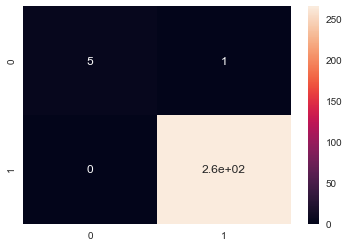

In [14]:
#calling the Function
TL()